In [14]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
newsgroups_train = fetch_20newsgroups(
    subset='train',
    remove=('headers', 'footers', 'quotes'),
    random_state=42
)
print(" Dataset loaded successfully!")

 Dataset loaded successfully!


In [8]:
df = pd.DataFrame({
    'category': [newsgroups_train.target_names[label] for label in newsgroups_train.target],
    'text': newsgroups_train.data
})

In [9]:
category_counts = df['category'].value_counts().sort_index()
print(category_counts)

category
alt.atheism                 480
comp.graphics               584
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
comp.windows.x              593
misc.forsale                585
rec.autos                   594
rec.motorcycles             598
rec.sport.baseball          597
rec.sport.hockey            600
sci.crypt                   595
sci.electronics             591
sci.med                     594
sci.space                   593
soc.religion.christian      599
talk.politics.guns          546
talk.politics.mideast       564
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64


In [10]:
min_count = category_counts.min()
max_count = category_counts.max()
print(f"\n   Min documents in a category: {min_count}")
print(f"   Max documents in a category: {max_count}")
print(f"   Difference: {max_count - min_count}")


   Min documents in a category: 377
   Max documents in a category: 600
   Difference: 223


 Saved visualization as 'category_distribution.png'


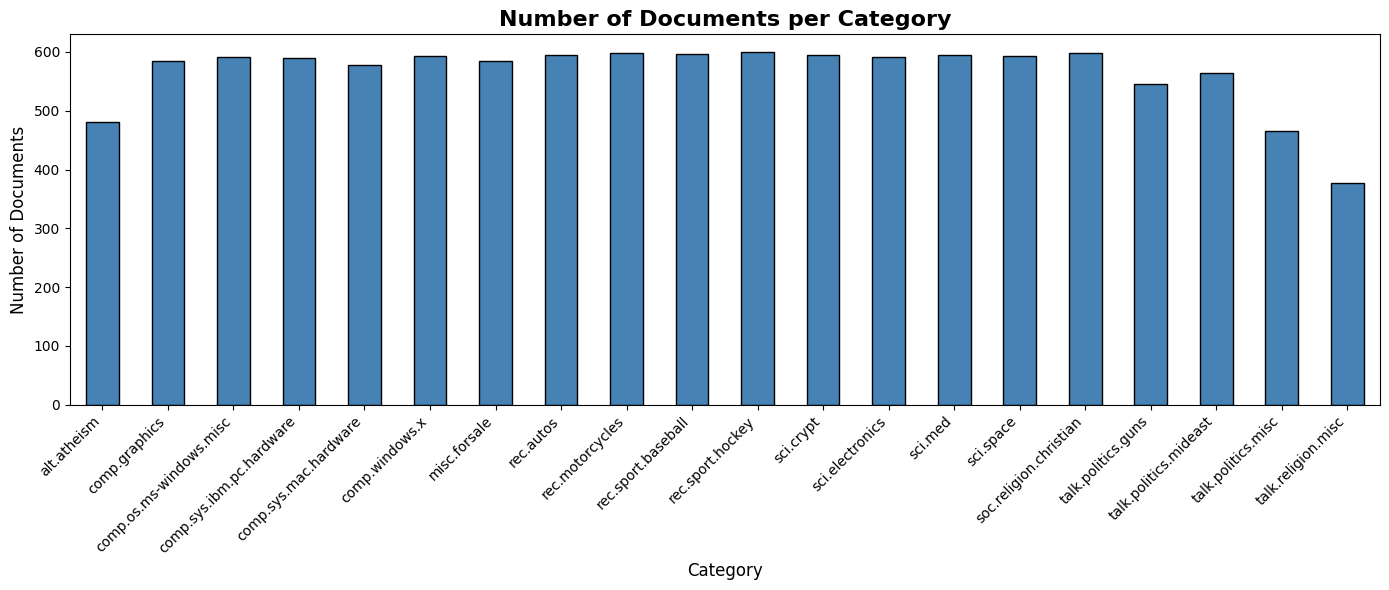

In [13]:
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Documents per Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('category_distribution.png', dpi=150, bbox_inches='tight')
print(" Saved visualization as 'category_distribution.png'")

In [15]:
random.seed(42)
sample_indices = random.sample(range(len(newsgroups_train.data)), 3)

In [16]:
for idx in sample_indices:
    doc = newsgroups_train.data[idx]
    category = newsgroups_train.target_names[newsgroups_train.target[idx]]
    
    print(f"   {'='*55}")
    print(f"   Category: {category}")
    print(f"   {'='*55}")
    # Show first 300 characters of the document
    print(f"   {doc[:300]}...")
    print(f"   [Document length: {len(doc)} characters]")
    print()

   Category: rec.sport.hockey
   This is a general question for US readers:

How extensive is the playoff coverage down there?  In Canada, it is almost
impossible not to watch a series on TV (ie the only two series I have not had
an opportunity to watch this year are Wash-NYI and Chi-Stl, the latter because
I'm in the wrong time zo...
   [Document length: 620 characters]

   Category: comp.sys.mac.hardware
   

	I think this kind of comparison is pretty useless in general.  The
processor is only good when a good computer is designed around it adn the
computer is used in its designed purpose.  Comparing processor speed is
pretty dumb because all you have to do is just increase the clock speed
to increase ...
   [Document length: 1105 characters]

   Category: comp.graphics
   I can't fiqure this out.  I have properly compiled pov on a unix machine
running SunOS 4.1.3  The problem is that when I run the sample .pov files and
use the EXACT same parameters when compiling different .tga out

In [17]:
sample_df = df.head(100)
sample_df.to_csv('sample_data.csv', index=False)
print("   ✓ Saved first 100 documents to 'sample_data.csv'")

print("\n" + "="*60)
print("EXPLORATION COMPLETE!")
print("="*60)
print("\nKey Takeaways:")
print("✓ We have 11,314 training documents")
print("✓ 20 different categories to classify")
print("✓ Classes are relatively balanced")
print("✓ Documents vary in length (some short, some long)")
print("\nNext Step: Text Preprocessing (cleaning the messy text)")
print("="*60)


   ✓ Saved first 100 documents to 'sample_data.csv'

EXPLORATION COMPLETE!

Key Takeaways:
✓ We have 11,314 training documents
✓ 20 different categories to classify
✓ Classes are relatively balanced
✓ Documents vary in length (some short, some long)

Next Step: Text Preprocessing (cleaning the messy text)
